In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv('/content/drive/MyDrive/ML_Data/HR_Data.csv')

In [40]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [41]:
data.shape

(54808, 14)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [43]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [44]:
data = data.dropna()

In [45]:
data = data.drop('employee_id', axis = 1)

In [46]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [47]:
for col in data.columns:
  if data[col].dtype == 'object':
    print(data[col].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_32' 'region_6' 'region_33' 'region_8'
 'region_24' 'region_3' 'region_9' 'region_18']
["Master's & above" "Bachelor's" 'Below Secondary']
['f' 'm']
['sourcing' 'other' 'referred']


In [48]:
data_int = data.select_dtypes(exclude = 'object')

In [49]:
data_obj = data.select_dtypes(include = 'object')

In [50]:
x = data.drop('is_promoted', axis = 1)
y = data['is_promoted']

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            48660 non-null  object 
 1   region                48660 non-null  object 
 2   education             48660 non-null  object 
 3   gender                48660 non-null  object 
 4   recruitment_channel   48660 non-null  object 
 5   no_of_trainings       48660 non-null  int64  
 6   age                   48660 non-null  int64  
 7   previous_year_rating  48660 non-null  float64
 8   length_of_service     48660 non-null  int64  
 9   KPIs_met >80%         48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [52]:
#numerical and categorical data
numerical_features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']
categorical_features = ['department','region','education','gender','recruitment_channel']

In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [55]:
x_train = x.sample(frac=0.75, random_state = 1)
x_train_scaled = preprocessor.fit_transform(x_train)
x_test = x.drop(x_train.index)
x_test_scaled = preprocessor.transform(x_test)

In [56]:
x_train_scaled = pd.DataFrame.sparse.from_spmatrix(x_train_scaled)

In [57]:
x_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.418975,0.847164,0.530294,-0.312523,-0.742382,-0.153957,-1.097610,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.418975,-0.745230,-1.851231,-1.030845,-0.742382,-0.153957,-0.645735,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.418975,-1.143328,1.324135,-0.312523,1.347016,-0.153957,1.237077,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.418975,-0.081732,-1.851231,-0.791404,-0.742382,-0.153957,-0.645735,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.418975,0.050967,-0.263548,-0.551963,-0.742382,-0.153957,-1.097610,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
x_test_scaled = pd.DataFrame.sparse.from_spmatrix(x_test_scaled)
x_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.418975,-0.479831,1.324135,-0.312523,1.347016,-0.153957,-0.721048,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.418975,0.183667,-1.851231,0.884681,-0.742382,-0.153957,-0.269173,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.418975,0.316366,-0.263548,-0.312523,1.347016,-0.153957,1.011139,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.418975,0.183667,-0.263548,0.645240,-0.742382,-0.153957,-0.344485,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.418975,-1.010629,-0.263548,-0.551963,-0.742382,-0.153957,-0.043235,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [59]:
y_train = y.sample(frac=0.75, random_state = 1)
y_test = y.drop(y_train.index)

In [60]:
model = tf.keras.Sequential()

In [61]:
from tensorflow.keras import regularizers
model.add(tf.keras.layers.Dense(59, activation='relu',kernel_regularizer=regularizers.L2(0.01), input_shape=(x_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dense(132, activation='relu',kernel_regularizer=regularizers.L2(0.01),  input_shape=(x_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dropout(0.1, input_shape=(x_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dense(132, activation='relu',kernel_regularizer=regularizers.L2(0.01),  input_shape=(x_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 59)                3481      
                                                                 
 dense_5 (Dense)             (None, 132)               7920      
                                                                 
 dropout_1 (Dropout)         (None, 132)               0         
                                                                 
 dense_6 (Dense)             (None, 132)               17556     
                                                                 
 dense_7 (Dense)             (None, 1)                 133       
                                                                 
Total params: 29,090
Trainable params: 29,090
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy','Precision','recall'])

In [64]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [65]:
history = model.fit(x_train_scaled, y_train, epochs = 100, callbacks=[callback])

Epoch 1/100
1141/1141 [==============================] - 3s 2ms/step - loss: 0.4338 - accuracy: 0.9134 - precision: 0.1538
Epoch 2/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2586 - accuracy: 0.9171 - precision: 0.8726
Epoch 3/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2507 - accuracy: 0.9231 - precision: 0.9002
Epoch 4/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2444 - accuracy: 0.9263 - precision: 0.9397
Epoch 5/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2389 - accuracy: 0.9288 - precision: 0.9475
Epoch 6/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2353 - accuracy: 0.9303 - precision: 0.9199
Epoch 7/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2313 - accuracy: 0.9326 - precision: 0.9511
Epoch 8/100
1141/1141 [==============================] - 2s 2ms/step - loss: 0.2278 - accuracy: 0.9329 - precision: 0.9404
Epoch 9/100
1141

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [67]:
threshold = 0.5

In [70]:
y_predict = model.predict(x_test_scaled)
binary_predictions = [1 if pred >= threshold else 0 for pred in y_predict]
binary_predictions[:5]

381/381 [==============================] - 0s 1ms/step


AttributeError: ignored

[[11074     1]
 [  777   313]]


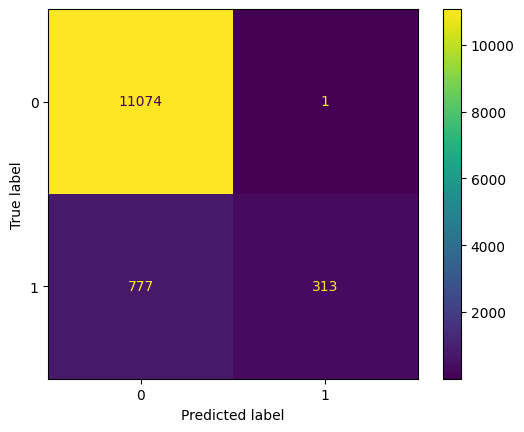

In [72]:
confusionmatrix = confusion_matrix(y_test, binary_predictions)
print(confusionmatrix)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=[0,1])
disp.plot()

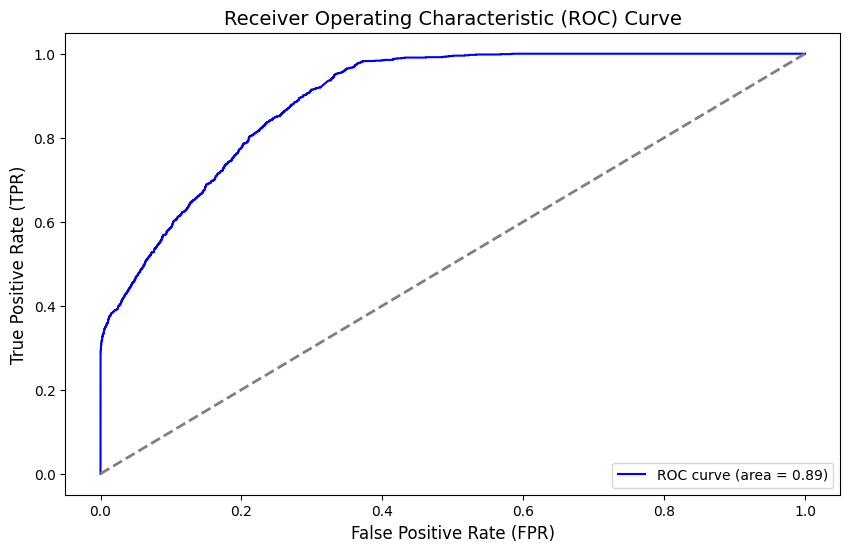

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()